In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
prices = pd.read_csv('data_house_prices.csv')
prices.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [14]:
#Model OLS
Y = prices['SalePrice']
X = prices[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd']]
X = pd.concat([X**i for i in range(1,100)], axis=1)
X_egitim, X_test, y_egitim, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [15]:
lrm = LinearRegression()
lrm.fit(X_egitim, y_egitim)

y_egitim_tahmini = lrm.predict(X_egitim)
y_test_tahmini = lrm.predict(X_test)

print("Eğitim kümesindeki gözlem sayısı  : {}".format(X_egitim.shape[0]))
print("Test kümesindeki gözlem sayısı    : {}".format(X_test.shape[0]), "\n")

print("Eğitim kümesindeki R-Kare değeri  : {}".format(lrm.score(X_egitim, y_egitim)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lrm.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesindeki gözlem sayısı  : 1168
Test kümesindeki gözlem sayısı    : 292 

Eğitim kümesindeki R-Kare değeri  : 0.9383011277363738
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.5094919083831226
Ortalama Mutlak Hata (MAE)        : 34931.91780821918
Ortalama Kare Hata (MSE)          : 3553911040.2054796
Kök Ortalama Kare Hata (RMSE)     : 59614.68812470195
Ortalama Mutlak Yüzde Hata (MAPE) : 19.538685068026883


In [16]:
#Model Ridge
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_egitim, y_egitim)

y_egitim_tahmini = ridgeregr.predict(X_egitim)
y_test_tahmini = ridgeregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_egitim, y_egitim)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8945513637339573
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.6011545220303801
Ortalama Mutlak Hata (MAE)        : 38782.01187818259
Ortalama Kare Hata (MSE)          : 2889781782.84448
Kök Ortalama Kare Hata (RMSE)     : 53756.690586795616
Ortalama Mutlak Yüzde Hata (MAPE) : 22.07974980880078


In [17]:
#Model Lasso
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_egitim, y_egitim)

y_egitim_tahmini = lassoregr.predict(X_egitim)
y_test_tahmini = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_egitim, y_egitim)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8844185690321256
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.6877749601451556
Ortalama Mutlak Hata (MAE)        : 33926.30642540414
Ortalama Kare Hata (MSE)          : 2262184936.6664915
Kök Ortalama Kare Hata (RMSE)     : 47562.43198856101
Ortalama Mutlak Yüzde Hata (MAPE) : 19.506054224809187


In [18]:
#Model ElasticNet
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_egitim, y_egitim)

y_egitim_tahmini = elasticregr.predict(X_egitim)
y_test_tahmini = elasticregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(elasticregr.score(X_egitim, y_egitim)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(elasticregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8781567914157714
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.7070667377785924
Ortalama Mutlak Hata (MAE)        : 32327.29390657987
Ortalama Kare Hata (MSE)          : 2122408931.5639875
Kök Ortalama Kare Hata (RMSE)     : 46069.6096311222
Ortalama Mutlak Yüzde Hata (MAPE) : 18.458656976149594


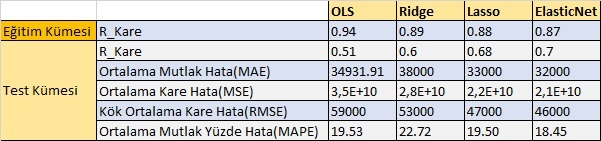

In [19]:
from IPython.display import Image
Image(filename = "bilgi.jpg")

OLS modelimizi değerlerin 100 üssünü alarak overfit haline getirdik. daha sonra Ridge Lassa ve ElasticNet regresyonlarını test ettik. en anlamlıtest grubunu ElasticNet regresyon modelimizde elde ettik.